In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

In [51]:
pd_textbook = pd.read_csv("/Users/joaobaptista/Documents/personal/mineracao-dados-massivos/evaluation/evaluation/pd_textbook_test_embedding_1000.csv")

In [61]:
pd_textbook.columns

Index(['Unnamed: 0', 'sentence', 'embedding_sentence', 'token_sentence',
       'metadata', 'rewrited_sentence', 'rewrited_sentence_embedding',
       'rewrited_sentence_token_count', 'rewrited_sentence_embedding_np'],
      dtype='object')

In [55]:
pd_textbook['rewrited_sentence_embedding_np'] = pd_textbook['rewrited_sentence_embedding'].apply(eval).apply(np.array)

In [85]:
pd_textbook['embedding_sentence_np'] = pd_textbook['embedding_sentence'].apply(eval).apply(np.array)

In [123]:
vector_embedding_reference = pd_textbook["rewrited_sentence_embedding_np"][7]

In [139]:
sentence_reference = pd_textbook["sentence"][7]

In [124]:
pd_textbook_10 = pd_textbook.head(10)

In [95]:
sentence = pd_textbook_10["sentence"].values

In [98]:
query_id = pd_textbook_10["Unnamed: 0"].values

In [99]:
cos_sim_array = cosine_similarity(list(pd_textbook_10["embedding_sentence_np"].values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=query_id, columns=query_id)

In [100]:
df

,0,2,3,4,5,7,8,9,10,12
0,1.000000,0.879234,0.868362,0.869932,0.881523,0.869066,0.850449,0.840540,0.830564,0.889685
2,0.879234,1.000000,0.899387,0.863709,0.922916,0.814829,0.917926,0.784409,0.841273,0.912924
3,0.868362,0.899387,1.000000,0.935112,0.878246,0.856055,0.886851,0.811597,0.898410,0.908055
4,0.869932,0.863709,0.935112,1.000000,0.863917,0.880448,0.849669,0.816154,0.936084,0.907186
5,0.881523,0.922916,0.878246,0.863917,1.000000,0.810038,0.872500,0.775200,0.841152,0.946930
7,0.869066,0.814829,0.856055,0.880448,0.810038,1.000000,0.825789,0.900232,0.863989,0.843834
8,0.850449,0.917926,0.886851,0.849669,0.872500,0.825789,1.000000,0.779065,0.820234,0.862838
9,0.840540,0.784409,0.811597,0.816154,0.775200,0.900232,0.779065,1.000000,0.813916,0.780938
10,0.830564,0.841273,0.898410,0.936084,0.841152,0.863989,0.820234,0.813916,1.000000,0.872341
12,0.889685,0.912924,0.908055,0.907186,0.946930,0.843834,0.862838,0.780938,0.872341,1.000000


[Text(0.5, 1, '0'),
 Text(1.5, 1, '2'),
 Text(2.5, 1, '3'),
 Text(3.5, 1, '4'),
 Text(4.5, 1, '5'),
 Text(5.5, 1, '7'),
 Text(6.5, 1, '8'),
 Text(7.5, 1, '9'),
 Text(8.5, 1, '10'),
 Text(9.5, 1, '12')]

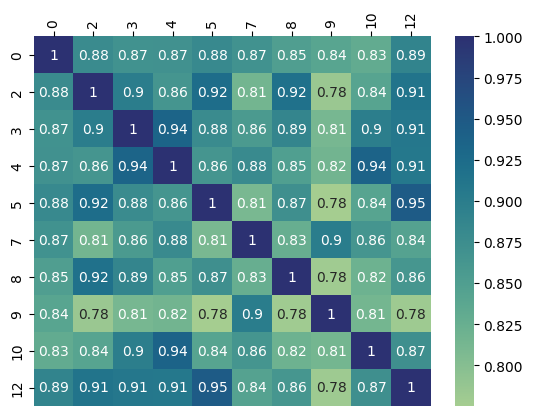

In [102]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(query_id, rotation=90)

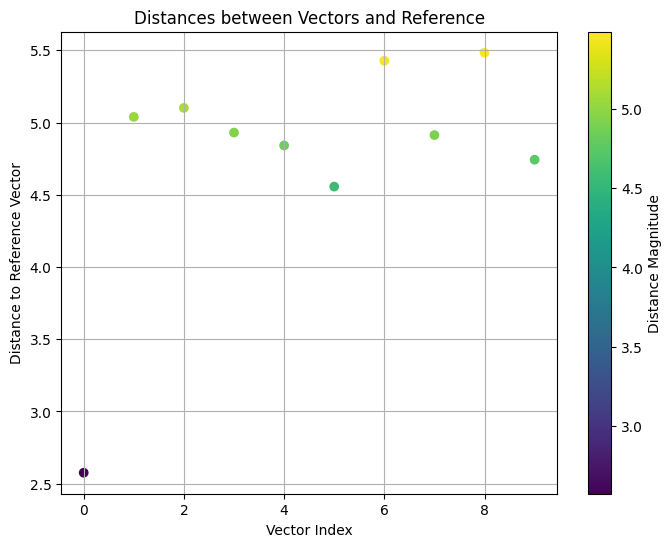

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: 10 vectors (each with 3 dimensions) and 1 reference vector
data = list(pd_textbook_10["embedding_sentence_np"].values)  # 10 vectors with 3 dimensions
reference_vector = vector_embedding_reference  # Reference vector with 3 dimensions

# Calculate distances using Euclidean distance
distances = np.linalg.norm(data - reference_vector, axis=1)

# Visualization: Scatter plot with distances colored by magnitude
plt.figure(figsize=(8, 6))
plt.scatter(range(len(distances)), distances, c=distances, cmap='viridis')  # Color by distance
plt.xlabel('Vector Index')
plt.ylabel('Distance to Reference Vector')
plt.title('Distances between Vectors and Reference')
plt.colorbar(label='Distance Magnitude')
plt.grid(True)
plt.show()

# Note: Confusion matrix is not suitable here
# A confusion matrix is typically used for classification tasks with discrete labels.
# In this case, we're calculating distances, not classifying vectors.


In [107]:
distances

array([2.57617199, 5.03932413, 5.101682  , 4.93098181, 4.84202319,
       4.5569478 , 5.4285675 , 4.91357796, 5.48368644, 4.74303   ])

In [148]:
eud_dist = euclidean_distances(list(pd_textbook_10["embedding_sentence_np"].values), [vector_embedding_reference])

cos_sim_array = cosine_similarity(list(pd_textbook_10["embedding_sentence_np"].values), [vector_embedding_reference])

In [149]:
cos_sim_array

array([[0.84115569],
       [0.80354548],
       [0.83090904],
       [0.85470315],
       [0.80294134],
       [0.91225994],
       [0.80803566],
       [0.97052742],
       [0.84801433],
       [0.81024957]])

[Text(0.5, 1, '0'),
 Text(1.5, 1, '2'),
 Text(2.5, 1, '3'),
 Text(3.5, 1, '4'),
 Text(4.5, 1, '5'),
 Text(5.5, 1, '7'),
 Text(6.5, 1, '8'),
 Text(7.5, 1, '9'),
 Text(8.5, 1, '10'),
 Text(9.5, 1, '12')]

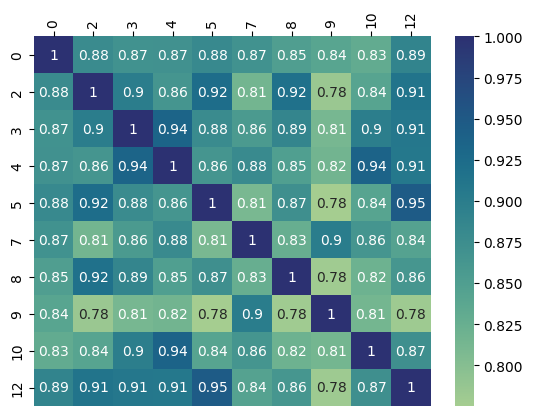

In [150]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(query_id, rotation=90)

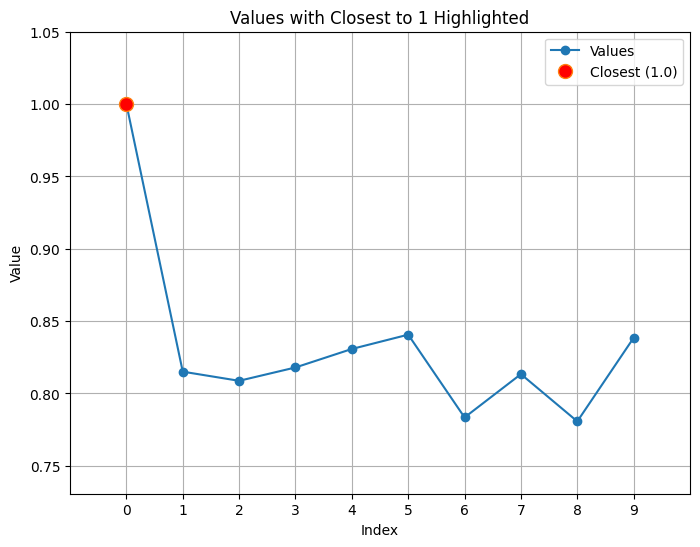

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array
data = np.array([[0.94992452],
                 [0.8150429 ],
                 [0.8087211 ],
                 [0.81795517],
                 [0.83072551],
                 [0.84062311],
                 [0.78340369],
                 [0.81333844],
                 [0.78068093],
                 [0.83845735]])

# Find the closest value to 1
closest_value = np.min(np.abs(data - 1))  # Absolute difference for distance
closest_index = np.argmin(np.abs(data - 1))  # Index of closest value

# Separate data and highlight the closest
data_to_plot = data.copy()
data_to_plot[closest_index] = np.array([[1.0]])  # Highlight closest with bold line

# Plotting with customization
plt.figure(figsize=(8, 6))
plt.plot(data_to_plot, marker='o', linestyle='-', label='Values')
plt.plot([closest_index], [1.0], marker='o', markersize=10, markerfacecolor='red', linestyle='', label='Closest (1.0)')  # Highlight closest
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Values with Closest to 1 Highlighted')
plt.legend()
plt.grid(True)

# Optional formatting
plt.xticks(range(len(data)))  # Set x-axis ticks to indices
plt.xlim(-1, len(data))  # Adjust x-axis limits for better visualization
plt.ylim(min(data_to_plot.flatten()) - 0.05, max(data_to_plot.flatten()) + 0.05)  # Adjust y-axis limits for better spacing

plt.show()


In [142]:
pd_textbook_10["euclidean_distances"] = euclidean_distances(list(pd_textbook_10["embedding_sentence_np"].values), [vector_embedding_reference])

/var/folders/zb/1nrg77jx4fsfsd6_g3kq20d40000gn/T/ipykernel_54639/3401893519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_textbook_10["euclidean_distances"] = euclidean_distances(list(pd_textbook_10["embedding_sentence_np"].values), [vector_embedding_reference])


In [143]:
pd_textbook_10

,Unnamed: 0,sentence,embedding_sentence,token_sentence,metadata,rewrited_sentence,rewrited_sentence_embedding,rewrited_sentence_token_count,rewrited_sentence_embedding_np,embedding_sentence_np,euclidean_distances
0,0,The essential feature of enuresis is repeated ...,"[-0.27569496631622314, 0.13381759822368622, 0....",210,"Raw file name is: Psichiatry_DSM-5.txt, Were r...",Enuresis is characterized by repeated involunt...,"[-0.08195801079273224, 0.1827828586101532, 0.1...",87,"[-0.08195801079273224, 0.1827828586101532, 0.1...","[-0.27569496631622314, 0.13381759822368622, 0....",4.557460
1,2,"Mitral valve prolapse, in which one leaflet mo...","[-0.3140565752983093, -0.22627578675746918, 0....",279,"Raw file name is: InternalMed_Harrison.txt, We...","Mitral valve prolapse, where one leaflet shift...","[-0.24928240478038788, -0.21157097816467285, 0...",221,"[-0.24928240478038788, -0.21157097816467285, 0...","[-0.3140565752983093, -0.22627578675746918, 0....",5.164089
2,3,"1378 parasites (i.e., >20% of parasites with v...","[-0.28109604120254517, 0.16703666746616364, -0...",399,"Raw file name is: InternalMed_Harrison.txt, We...",1378 parasites in peripheral blood or phagocyt...,"[-0.2917247712612152, 0.11056926101446152, -0....",191,"[-0.2917247712612152, 0.11056926101446152, -0....","[-0.28109604120254517, 0.16703666746616364, -0...",4.769765
3,4,Physicians should suspect C. sordellii infecti...,"[-0.23394657671451569, 0.11328402906656265, 0....",246,"Raw file name is: InternalMed_Harrison.txt, We...",Suspect C. sordellii infection in afebrile pat...,"[-0.2776722311973572, 0.10505430400371552, 0.0...",159,"[-0.2776722311973572, 0.10505430400371552, 0.0...","[-0.23394657671451569, 0.11328402906656265, 0....",4.377490
4,5,"For the most part, the treatment of hemoptysis...","[-0.28884926438331604, 0.24810218811035156, 0....",236,"Raw file name is: InternalMed_Harrison.txt, We...",Hemoptysis treatment typically depends on the ...,"[-0.2406291663646698, 0.29498544335365295, 0.1...",208,"[-0.2406291663646698, 0.29498544335365295, 0.1...","[-0.28884926438331604, 0.24810218811035156, 0....",5.194706
5,7,96e-8 The U.S. National Academy of Sciences re...,"[-0.2746782898902893, 0.2925874888896942, 0.03...",209,"Raw file name is: InternalMed_Harrison.txt, We...",Most North Americans receive adequate vitamin ...,"[-0.32366955280303955, 0.2333359271287918, -0....",119,"[-0.32366955280303955, 0.2333359271287918, -0....","[-0.2746782898902893, 0.2925874888896942, 0.03...",3.355902
6,8,Cerebral Perfusion and Autoregulation Brain ti...,"[-0.323844313621521, 0.10839750617742538, 0.36...",404,"Raw file name is: InternalMed_Harrison.txt, We...",Brain tissue necessitates ceaseless perfusion ...,"[-0.305573046207428, 0.04595043137669563, 0.40...",314,"[-0.305573046207428, 0.04595043137669563, 0.40...","[-0.323844313621521, 0.10839750617742538, 0.36...",5.081102
7,9,"(e.g., pregnancy or lactation). The RDA, which...","[-0.2209758758544922, 0.2025979608297348, 0.27...",230,"Raw file name is: InternalMed_Harrison.txt, We...","The RDA, which represents the nutrient intake ...","[-0.19517765939235687, 0.22588182985782623, 0....",178,"[-0.19517765939235687, 0.22588182985782623, 0....","[-0.2209758758544922, 0.2025979608297348, 0.27...",1.940036
8,10,For treatment of carbapenem-resistant Enteroba...,"[-0.40311554074287415, 0.09939263761043549, 0....",219,"Raw file name is: InternalMed_Harrison.txt, We...",Tigecycline and colistin exhibit promising in ...,"[-0.2910718023777008, 0.061854779720306396, 0....",178,"[-0.2910718023777008, 0.061854779720306396, 0....","[-0.40311554074287415, 0.09939263761043549, 0....",4.543102
9,12,Endocarditis Prophylaxis Two major predisposin...,"[-0.24300703406333923, 0.16108453273773193, 0....",234,"Raw file name is: InternalMed_Harrison.txt, We...",Infective endocarditis develops when a suscept...,"[-0.1752588003873825, 0.22603926062583923, 0.0...",170,"[-0.1752588003873825, 0.22603926062583923, 0.0...","[-0.24300703406333923, 0

In [156]:
for index, rows in enumerate(pd_textbook_10.iterrows()):
    row = rows[1]
    if row["sentence"] == sentence_reference:
        print(f"Sentence ID {row["Unnamed: 0"]}, match in the {index}th index, with euclidian distance {row["euclidean_distances"]}")
        print(f"\n\n Original Sentence: {row["sentence"]} \n\n Rewrited Sentence: {row["rewrited_sentence"]}")

Sentence ID 9, match in the 7th index, with euclidian distance 1.9400359853736031


 Original Sentence: (e.g., pregnancy or lactation). The RDA, which is the nutrient-intake based on observed or experimentally determined approximations of goal for planning diets of individuals, is defined statistically as two nutrient intakes in healthy people. In the DRIs, AIs rather than RDAs standard deviations above the EAR to ensure that the needs of any are proposed for nutrients consumed by infants (up to age 1 year) as given individual are met. The online tool at http://fnic.nal.usda.gov/ well as for chromium, fluoride, manganese, sodium, potassium, pantointeractiveDRI/ allows health professionals to calculate individualized thenic acid, biotin, choline, and water consumed by persons of all ages. daily nutrient recommendations for dietary planning based on the Vitamin D and calcium recommendations were recently revised, and DRIs for persons of a given age, sex, and weight. The RDAs are used mor

## Euclidian distance in Pyspark

# Fix the line in the test dataframe
# Pass thourgh the whole KB
# Calculate in the entire KB database
    # Distância Euclidiana
    # Produto Interno
    # Similaridade de Cosseno
    # Distancia Manhattan

# Return top 10 of each distance algorithm
# See if the top 10 has the true positive
# Create top1, top5 and top10 accurary, recall, f1-score for each distance algorithm
